In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

0.0.29
scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_raw.h5ad')
adata2 = sc.read_h5ad('h5ad/adata_soupx_trans_raw.h5ad')
adata3 = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

Trying to set attribute `.uns` of view, copying.


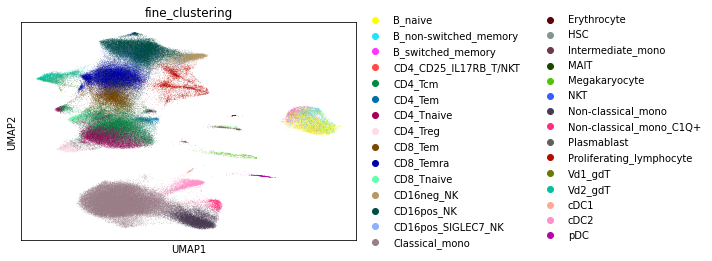

In [3]:
sc.pl.umap(rna[~(rna.obs['initial_clustering'] == 'doublets')], color=['fine_clustering'])

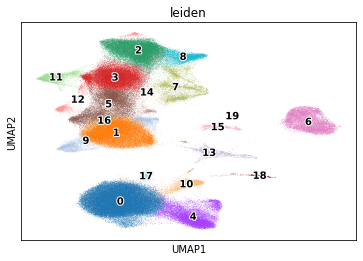

In [4]:
sc.pl.umap(rna, color=['leiden'], legend_loc = 'on data', legend_fontoutline = 2)

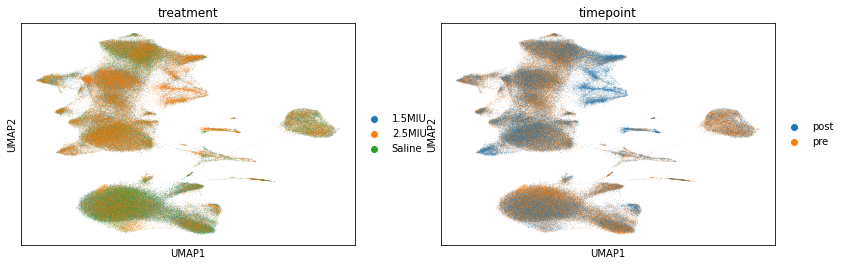

In [5]:
sc.pl.umap(rna, color = ['treatment', 'timepoint'])

In [6]:
rna.obs.initial_clustering.value_counts()

T                           73843
MNP                         66679
NK                          28843
doublets                    14843
B                            9842
Proliferating_lymphocyte     5065
gdT                          4624
NKT                          2674
Plasmablast                   706
Megakaryocyte                 553
pDC                           515
MAIT                          351
Erythrocyte                   140
HSC                            72
Name: initial_clustering, dtype: int64

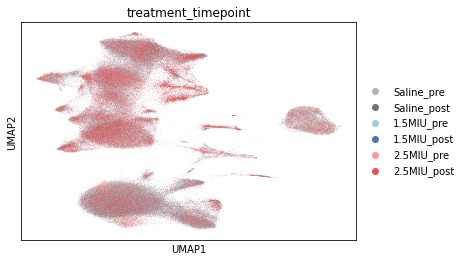

In [7]:
# assign colours to treatment timepoint
rna.obs['treatment_timepoint'] = [t+'_'+t_ for t,t_ in zip(rna.obs['treatment'], rna.obs['timepoint'])]
rna.obs['treatment_timepoint'] = rna.obs['treatment_timepoint'].astype('category')
rna.obs['treatment_timepoint'] = rna.obs['treatment_timepoint'].cat.reorder_categories(['Saline_pre', 'Saline_post', '1.5MIU_pre', '1.5MIU_post', '2.5MIU_pre', '2.5MIU_post'])
sc.pl.umap(rna, color = ['treatment_timepoint'], palette = ['#bab0ac', '#79706e', '#a0cbe8', '#4e79a7', '#fb9a99', '#e15759'])

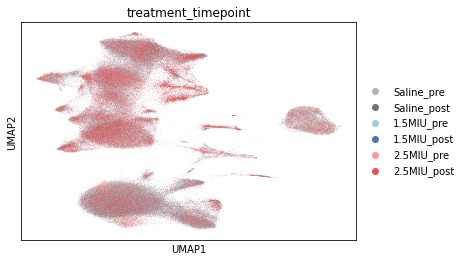

In [8]:
adata.obs['treatment_timepoint'] = [t+'_'+t_ for t,t_ in zip(adata.obs['treatment'], adata.obs['timepoint'])]
adata.obs['treatment_timepoint'] = adata.obs['treatment_timepoint'].astype('category')
adata.obs['treatment_timepoint'] = adata.obs['treatment_timepoint'].cat.reorder_categories(['Saline_pre', 'Saline_post', '1.5MIU_pre', '1.5MIU_post', '2.5MIU_pre', '2.5MIU_post'])
sc.pl.umap(adata, color = ['treatment_timepoint'], palette = ['#bab0ac', '#79706e', '#a0cbe8', '#4e79a7', '#fb9a99', '#e15759'])

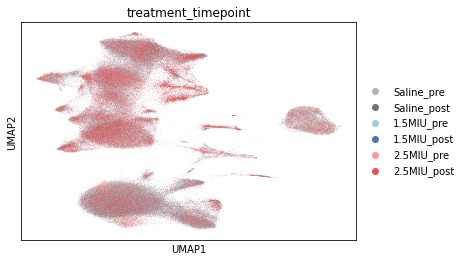

In [9]:
adata2.obs['treatment_timepoint'] = [t+'_'+t_ for t,t_ in zip(adata2.obs['treatment'], adata2.obs['timepoint'])]
adata2.obs['treatment_timepoint'] = adata2.obs['treatment_timepoint'].astype('category')
adata2.obs['treatment_timepoint'] = adata2.obs['treatment_timepoint'].cat.reorder_categories(['Saline_pre', 'Saline_post', '1.5MIU_pre', '1.5MIU_post', '2.5MIU_pre', '2.5MIU_post'])
sc.pl.umap(adata2, color = ['treatment_timepoint'], palette = ['#bab0ac', '#79706e', '#a0cbe8', '#4e79a7', '#fb9a99', '#e15759'])

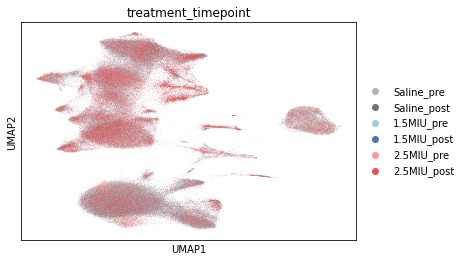

In [10]:
adata3.obs['treatment_timepoint'] = [t+'_'+t_ for t,t_ in zip(adata3.obs['treatment'], adata3.obs['timepoint'])]
adata3.obs['treatment_timepoint'] = adata3.obs['treatment_timepoint'].astype('category')
adata3.obs['treatment_timepoint'] = adata3.obs['treatment_timepoint'].cat.reorder_categories(['Saline_pre', 'Saline_post', '1.5MIU_pre', '1.5MIU_post', '2.5MIU_pre', '2.5MIU_post'])
sc.pl.umap(adata3, color = ['treatment_timepoint'], palette = ['#bab0ac', '#79706e', '#a0cbe8', '#4e79a7', '#fb9a99', '#e15759'])

### simple composition analysis

In [12]:
table = pd.crosstab(adata.obs['sampleid'], adata.obs['fine_clustering'])
table.drop(['doublets', 'Erythrocyte', 'Megakaryocyte'], axis = 1, inplace = True)
table

fine_clustering  B_naive  B_non-switched_memory  B_switched_memory  \
sampleid                                                             
Sample_Fq1            65                     30                 29   
Sample_Fq2            91                     58                 33   
Sample_Fq3           279                    158                127   
Sample_Fq4            91                     34                 31   
Sample_Fq5            44                     40                  8   
Sample_Fq6           100                     46                 27   
Sample_Fq7            74                     44                 34   
Sample_Fq8            76                     21                 14   
Sample_Fq9           176                     59                 47   
Sample_Fq10          177                     73                 74   
Sample_Fq11          131                     69                 69   
Sample_Fq12           89                     43                 33   
Sample_Fq13           90                     36                 15   
Sample_Fq14          203                     56                 59   
Sample_Fq15          283                     92                 65   
Sample_Fq16           65                     32                 18   
Sample_Fq17          220                     90                 47   
Sample_Fq18           54                     19                  8   
Sample_Fq19          183                     95                 67   
Sample_Fq20          129                     56                 23   
Sample_Fq21           87                     55                 45   
Sample_Fq22          203                     62                 33   
Sample_Fq23          612                    207                157   
Sample_Fq24          214                     78                 73   
Sample_Fq25          444                    164                107   
Sample_Fq26          416                    185                118   
Sample_Fq27          542                    105                 86   
Sample_Fq28          115                     69                 44   
Sample_Fq29          294                    155                113   
Sample_Fq30          183                     54                 68   
Sample_Fq31           48                     20                 15   
Sample_Fq32           65                     11                  8   

fine_clustering  CD4_CD25_IL17RB_T/NKT  CD4_Tcm  CD4_Tem  CD4_Tnaive  \
sampleid                                                               
Sample_Fq1                           0      592       61         368   
Sample_Fq2                           0      516       49         319   
Sample_Fq3                           0      775       96         460   
Sample_Fq4                           1      721       80         606   
Sample_Fq5                           0      101       10          44   
Sample_Fq6                           0      219       15         247   
Sample_Fq7                           0      400       34         171   
Sample_Fq8                           0      371       31         138   
Sample_Fq9                           0      759       85         378   
Sample_Fq10                          0      508       36         331   
Sample_Fq11                          0      616       49         308   
Sample_Fq12                          0      320       53         228   
Sample_Fq13                          0      319       31         243   
Sample_Fq14                          0      602       55         497   
Sample_Fq15                          0      987       69         558   
Sample_Fq16                          0      606       50         369   
Sample_Fq17                          0      357       33         278   
Sample_Fq18                         14     1038      156         616   
Sample_Fq19                          0      713       89         424   
Sample_Fq20                          1      852       50         458   
Sample_Fq21                        

In [13]:
import multiprocessing
from joblib import Parallel, delayed
from random import sample
from collections import Counter
from tqdm import tqdm

def sample_calc(df, query, iterations=1000):
    inputs = range(iterations)
    num_cores = multiprocessing.cpu_count()
    def sampleProportions(df, query, i):
        data = list(df.index.repeat(df[query]))
        size = len(data) // 100 * 100
        if size == 0 or size > len(data):
            size = len(data) // 10 * 10
        results = sample(data, size)
        return(Counter(results))
    
    counter = Parallel(n_jobs=num_cores)(delayed(sampleProportions)(df, query, n) for n in tqdm(inputs, desc = 'Randomly sample proportions for '+str(query)))
    c_ = Counter()
    for c in counter:
        c_ += c
    results = {}
    for key, record in c_.items():
        results.update({key:record/iterations})
    return(results)

In [14]:
final = pd.DataFrame()
for x in table.columns:
    final[x] = pd.Series(sample_calc(table, x))

Randomly sample proportions for B_naive: 100%|██████████| 1000/1000 [00:58<00:00, 17.20it/s]
Randomly sample proportions for B_non-switched_memory: 100%|██████████| 1000/1000 [00:21<00:00, 46.19it/s]
Randomly sample proportions for B_switched_memory: 100%|██████████| 1000/1000 [00:20<00:00, 49.29it/s]
Randomly sample proportions for CD4_CD25_IL17RB_T/NKT: 100%|██████████| 1000/1000 [00:18<00:00, 53.64it/s]
Randomly sample proportions for CD16pos_NK: 100%|██████████| 1000/1000 [00:41<00:00, 23.86it/s]
Randomly sample proportions for CD16pos_SIGLEC7_NK: 100%|██████████| 1000/1000 [00:19<00:00, 52.25it/s]
Randomly sample proportions for HSC: 100%|██████████| 1000/1000 [00:18<00:00, 52.87it/s]
Randomly sample proportions for Intermediate_mono: 100%|██████████| 1000/1000 [00:18<00:00, 53.54it/s]
Randomly sample proportions for NKT: 100%|██████████| 1000/1000 [00:21<00:00, 47.25it/s]
Randomly sample proportions for Non-classical_mono: 100%|██████████| 1000/1000 [00:29<00:00, 34.26it/s]
Rando

In [15]:
final['treatment_group'] = pd.Series(dict(zip(adata.obs['sampleid'], adata.obs['treatment_timepoint'])))

In [18]:
saline_pre = final[final['treatment_group'] == 'Saline_pre'].drop('treatment_group', axis = 1)
saline_post = final[final['treatment_group'] == 'Saline_post'].drop('treatment_group', axis = 1)
low_pre = final[final['treatment_group'] == '1.5MIU_pre'].drop('treatment_group', axis = 1)
low_post = final[final['treatment_group'] == '1.5MIU_post'].drop('treatment_group', axis = 1)
high_pre = final[final['treatment_group'] == '2.5MIU_pre'].drop('treatment_group', axis = 1)
high_post = final[final['treatment_group'] == '2.5MIU_post'].drop('treatment_group', axis = 1)

In [28]:
final = pd.DataFrame()
a= saline_pre.apply(lambda x: np.mean(x), axis = 0)
b= saline_post.apply(lambda x: np.mean(x), axis = 0)
c=low_pre.apply(lambda x: np.mean(x), axis = 0)
d=low_post.apply(lambda x: np.mean(x), axis = 0)
e =high_pre.apply(lambda x: np.mean(x), axis = 0)
f=high_post.apply(lambda x: np.mean(x), axis = 0)
final = final.append([a,b,c,d,e,f])
final.index = ['Saline_pre', 'Saline_post', '1.5MIU_pre', '1.5MIU_post', '2.5MIU_pre', '2.5MIU_post']

In [35]:
final

B_naive  B_non-switched_memory  B_switched_memory  \
Saline_pre   170.750000              70.936000          46.686000   
Saline_post  225.250000              89.654000          56.846000   
1.5MIU_pre   163.000000              76.500000          54.918667   
1.5MIU_post   99.000000              41.166667          30.521333   
2.5MIU_pre   314.833333             111.106667          76.662667   
2.5MIU_post  125.833333              47.500000          35.542667   

             CD4_CD25_IL17RB_T/NKT      CD4_Tcm     CD4_Tem  CD4_Tnaive  \
Saline_pre                     NaN   468.218000   32.032000  293.282000   
Saline_post                    NaN   557.000000   40.532000  434.750000   
1.5MIU_pre                     NaN   604.684000   56.081333  319.666667   
1.5MIU_post                    1.0   454.982667   43.500000  319.688000   
2.5MIU_pre                     NaN   712.188000   50.936000  532.333333   
2.5MIU_post                    4.5  1044.666667  101.106667  642.957333   

               CD4_Treg     CD8_Tem   CD8_Temra  ...         NKT  \
Saline_pre    47.468000  201.250000  312.500000  ...   45.968000   
Saline_post   62.032000  160.282000  269.314000  ...   54.058000   
1.5MIU_pre    40.478667  427.500000  854.730667  ...   83.436000   
1.5MIU_post  102.709333  260.436000  596.978667  ...   53.500000   
2.5MIU_pre    34.978667  465.166667  792.769333  ...  107.790667   
2.5MIU_post  265.500000  439.209333  834.312000  ...  121.922667   

             Non-classical_mono  Non-classical_mono_C1Q+  Plasmablast  \
Saline_pre           732.256000                56.500000    17.000000   
Saline_post          388.776000                46.282000    16.340000   
1.5MIU_pre           313.354667                22.000000     8.376000   
1.5MIU_post          326.957333                42.478667    10.085333   
2.5MIU_pre           237.542667                27.000000    25.893333   
2.5MIU_post          191.457333                73.333333    33.418667   

             Proliferating_lymphocyte    Vd1_gdT     Vd2_gdT   cDC1  \
Saline_pre                  39.250000  18.872000  114.526000  7.096   
Saline_post                 30.096000  18.750000   98.590000  7.752   
1.5MIU_pre                  20.397333  46.854667   98.230667  4.272   
1.5MIU_post                159.752000  33.833333   64.397333  1.718   
2.5MIU_pre                  48.213333  46.940000  131.120000  3.800   
2.5MIU_post                558.740000  47.290667  114.174667  0.564   

                   cDC2        pDC  
Saline_pre   240.218000  29.340000  
Saline_post  116.282000  20.000000  
1.5MIU_pre   135.854667  17.000000  
1.5MIU_post  104.500000   5.333333  
2.5MIU_pre    82.666667  24.440000  
2.5MIU_post   72.645333  15.000000  

[6 rows x 28 columns]

In [30]:
def absolute_value(val):
    a  = round(val,2)
    return a

array([[<AxesSubplot:ylabel='CD4_Tnaive'>,
        <AxesSubplot:ylabel='CD4_Tcm'>, <AxesSubplot:ylabel='CD4_Tem'>,
        <AxesSubplot:ylabel='CD4_Treg'>],
       [<AxesSubplot:ylabel='CD8_Tnaive'>,
        <AxesSubplot:ylabel='CD8_Tem'>, <AxesSubplot:ylabel='CD8_Temra'>,
        <AxesSubplot:ylabel='CD4_CD25_IL17RB_T/NKT'>],
       [<AxesSubplot:ylabel='MAIT'>, <AxesSubplot:ylabel='Vd1_gdT'>,
        <AxesSubplot:ylabel='Vd2_gdT'>, <AxesSubplot:ylabel='NKT'>],
       [<AxesSubplot:ylabel='CD16neg_NK'>,
        <AxesSubplot:ylabel='CD16pos_NK'>,
        <AxesSubplot:ylabel='CD16pos_SIGLEC7_NK'>,
        <AxesSubplot:ylabel='Proliferating_lymphocyte'>]], dtype=object)

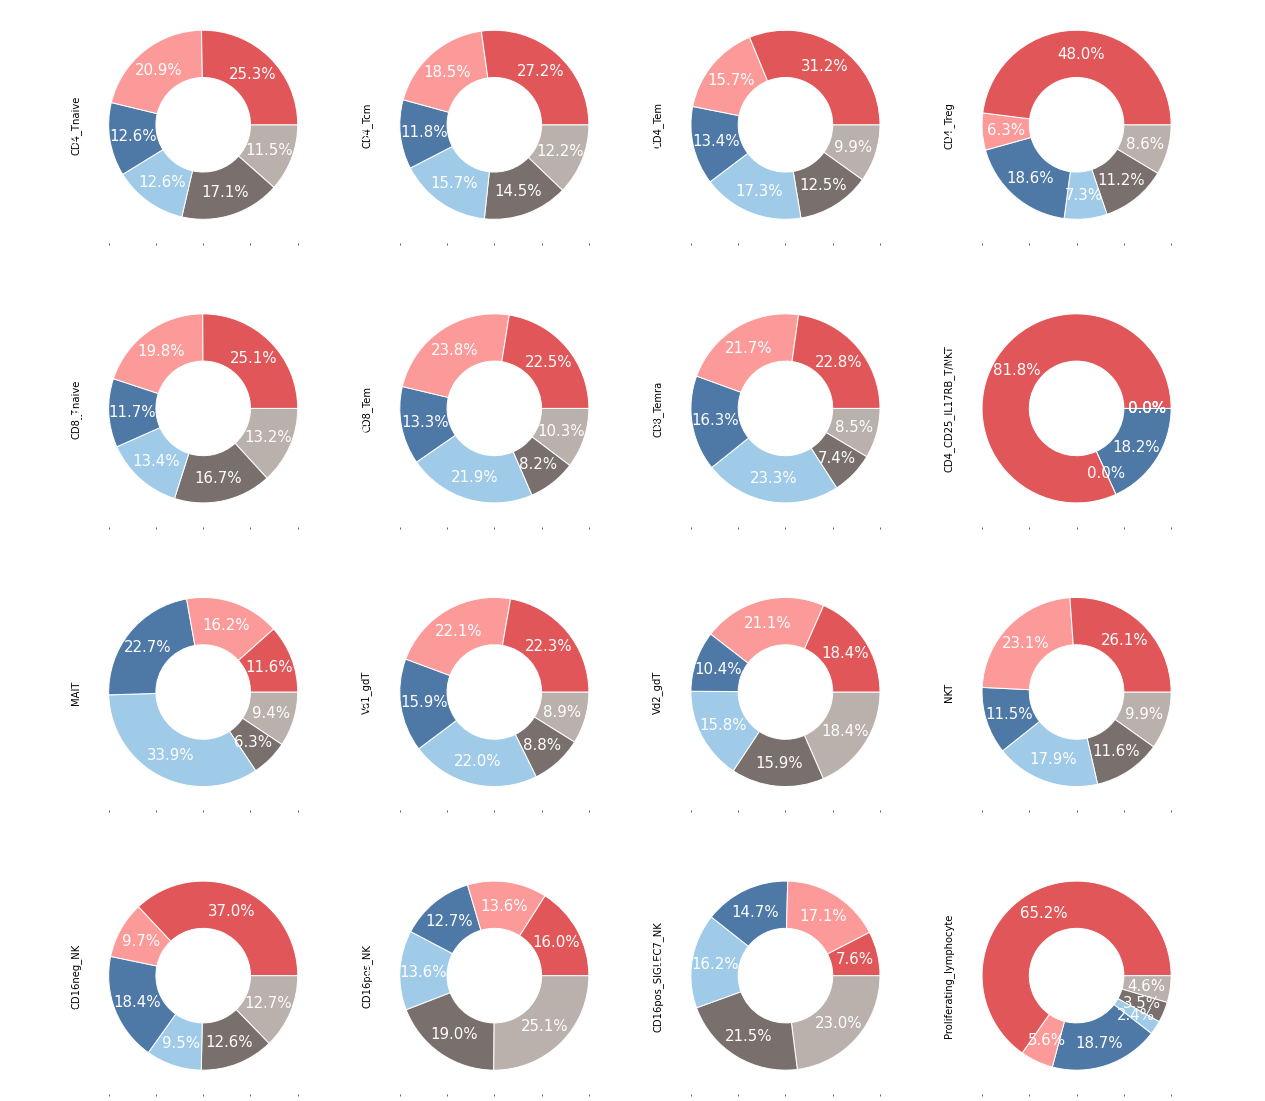

In [31]:
import matplotlib.pyplot as plt
# for x in final.columns:
final[['CD4_Tnaive', 'CD4_Tcm', 'CD4_Tem', 'CD4_Treg', 'CD8_Tnaive', 'CD8_Tem', 'CD8_Temra', 'CD4_CD25_IL17RB_T/NKT', 'MAIT', 'Vd1_gdT', 'Vd2_gdT', 'NKT', 'CD16neg_NK', 'CD16pos_NK', 'CD16pos_SIGLEC7_NK', 'Proliferating_lymphocyte']].plot.pie(autopct='%1.1f%%', 
               textprops={'fontsize': 15, 'color':'white'}, 
               pctdistance=0.75, 
               wedgeprops=dict(width=0.5, edgecolor='w'),
               colors = [dict(zip(adata.obs['treatment_timepoint'].cat.categories, adata.uns['treatment_timepoint_colors']))[i] for i in final.index], 
               legend=False, 
               counterclock=False, subplots=True, figsize=(20, 20),
               layout = (4,4))

array([[<AxesSubplot:ylabel='B_naive'>,
        <AxesSubplot:ylabel='B_non-switched_memory'>,
        <AxesSubplot:ylabel='B_switched_memory'>,
        <AxesSubplot:ylabel='Plasmablast'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

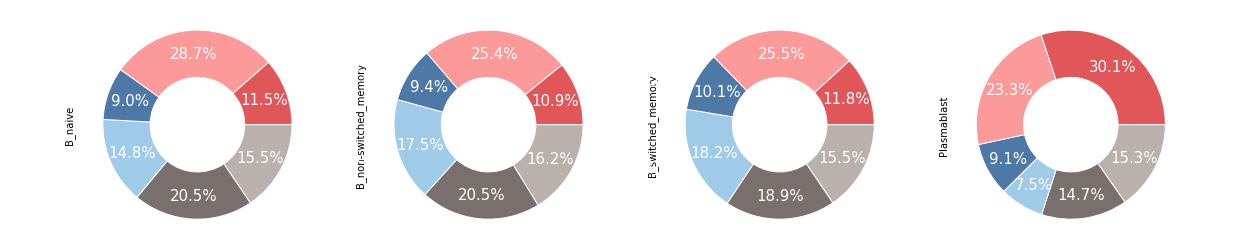

In [32]:
import matplotlib.pyplot as plt
# for x in final.columns:
final[['B_naive', 'B_non-switched_memory', 'B_switched_memory', 'Plasmablast']].plot.pie(autopct='%1.1f%%', 
               textprops={'fontsize': 15, 'color':'white'}, 
               pctdistance=0.75, 
               wedgeprops=dict(width=0.5, edgecolor='w'),
               colors = [dict(zip(adata.obs['treatment_timepoint'].cat.categories, adata.uns['treatment_timepoint_colors']))[i] for i in final.index], 
               legend=False, 
               counterclock=False, subplots=True, figsize=(20, 20),
               layout = (4,4))

array([[<AxesSubplot:ylabel='HSC'>,
        <AxesSubplot:ylabel='Classical_mono'>,
        <AxesSubplot:ylabel='Intermediate_mono'>,
        <AxesSubplot:ylabel='Non-classical_mono'>],
       [<AxesSubplot:ylabel='Non-classical_mono_C1Q+'>,
        <AxesSubplot:ylabel='cDC1'>, <AxesSubplot:ylabel='cDC2'>,
        <AxesSubplot:ylabel='pDC'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

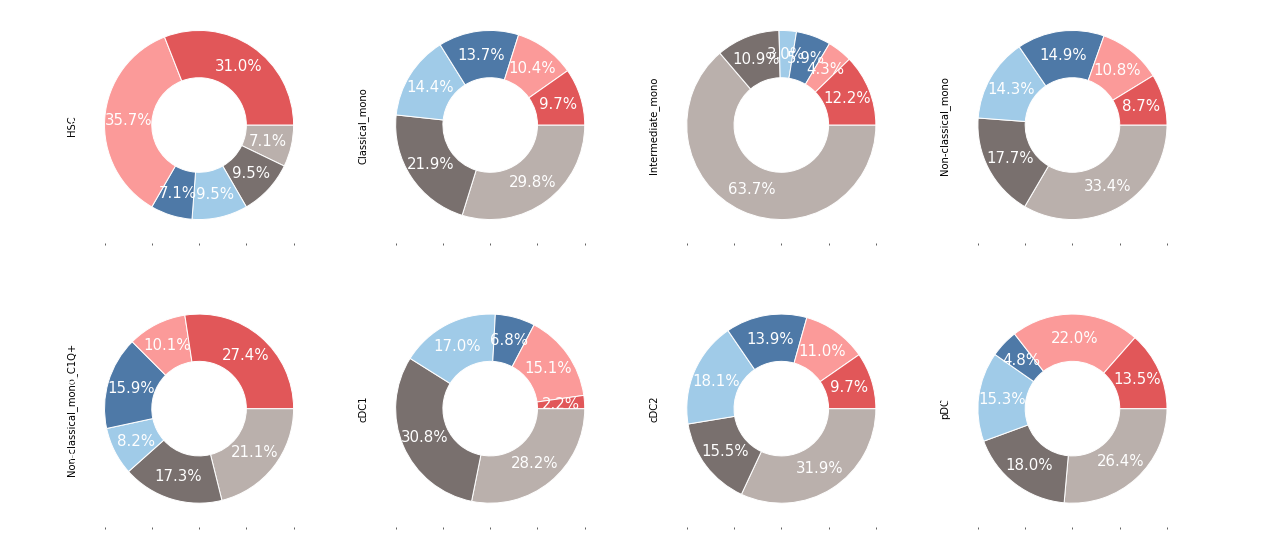

In [33]:
import matplotlib.pyplot as plt
# for x in final.columns:
final[['HSC', 'Classical_mono', 'Intermediate_mono', 'Non-classical_mono', 'Non-classical_mono_C1Q+', 'cDC1', 'cDC2', 'pDC']].plot.pie(autopct='%1.1f%%', 
               textprops={'fontsize': 15, 'color':'white'}, 
               pctdistance=0.75, 
               wedgeprops=dict(width=0.5, edgecolor='w'),
               colors = [dict(zip(adata.obs['treatment_timepoint'].cat.categories, adata.uns['treatment_timepoint_colors']))[i] for i in final.index], 
               legend=False, 
               counterclock=False, subplots=True, figsize=(20, 20),
               layout = (4,4))

In [36]:
# save temporarily
rna.write('h5ad/adata_soupx_trans_cite_rna.h5ad', compression = 'gzip')
adata.write('h5ad/adata_soupx_trans_cite_raw.h5ad', compression = 'gzip')
adata2.write('h5ad/adata_soupx_trans_raw.h5ad', compression = 'gzip')
adata3.write('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad', compression = 'gzip')

In [37]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['T']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in rnax.var.index:
    if re.search('^TR[AB][VDJ]', i):
        rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [38]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

In [39]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')

2021-01-22 10:31:23,150 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 10:31:57,263 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 10:32:31,937 - harmonypy - INFO - Iteration 3 of 10
2021-01-22 10:33:05,201 - harmonypy - INFO - Iteration 4 of 10
2021-01-22 10:33:22,529 - harmonypy - INFO - Iteration 5 of 10
2021-01-22 10:33:34,345 - harmonypy - INFO - Converged after 5 iterations


In [40]:
# run UMAP
sc.tl.umap(rnax, min_dist = 0.3)

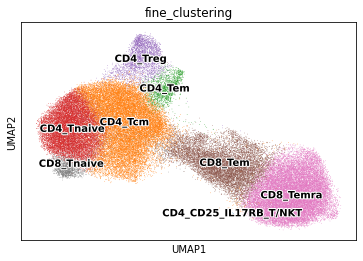

In [41]:
# find clusters
sc.pl.umap(rnax, color=['fine_clustering'], legend_loc ='on data', legend_fontoutline=2)

In [43]:
adatax = adata3[adata3.obs_names.isin(rnax.obs_names)].copy()
adatax = adatax[:, adatax.var.feature_types == 'Antibody Capture']
adatax.obs = rnax.obs.copy()
adatax.obsm = rnax.obsm.copy()
adatax.obsp = rnax.obsp.copy()

In [97]:
import math
vmax = list()
genes = [i for i in adatax.var.index]
for g in genes:
    idx = adatax.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax.X[:,idx].toarray(), 0.99) * 100.0) / 100.0)
    vmax.append(math.ceil(np.quantile(adatax.X[:,idx].toarray(), 0.99) * 100.0) / 100.0)

0.28
0.73
0.6
0.23
0.2
0.19
0.3
0.17
0.22
0.39


In [98]:
vmin = list()
for g in genes:
    idx = adatax.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax.X[:,idx].toarray(), 0.5) * 100.0) / 100.0)
    vmin.append(math.ceil(np.quantile(adatax.X[:,idx].toarray(), 0.5) * 100.0) / 100.0)

-0.12
0.15
0.03
-0.12
-0.12
-0.1
-0.12
-0.13
-0.15
-0.08


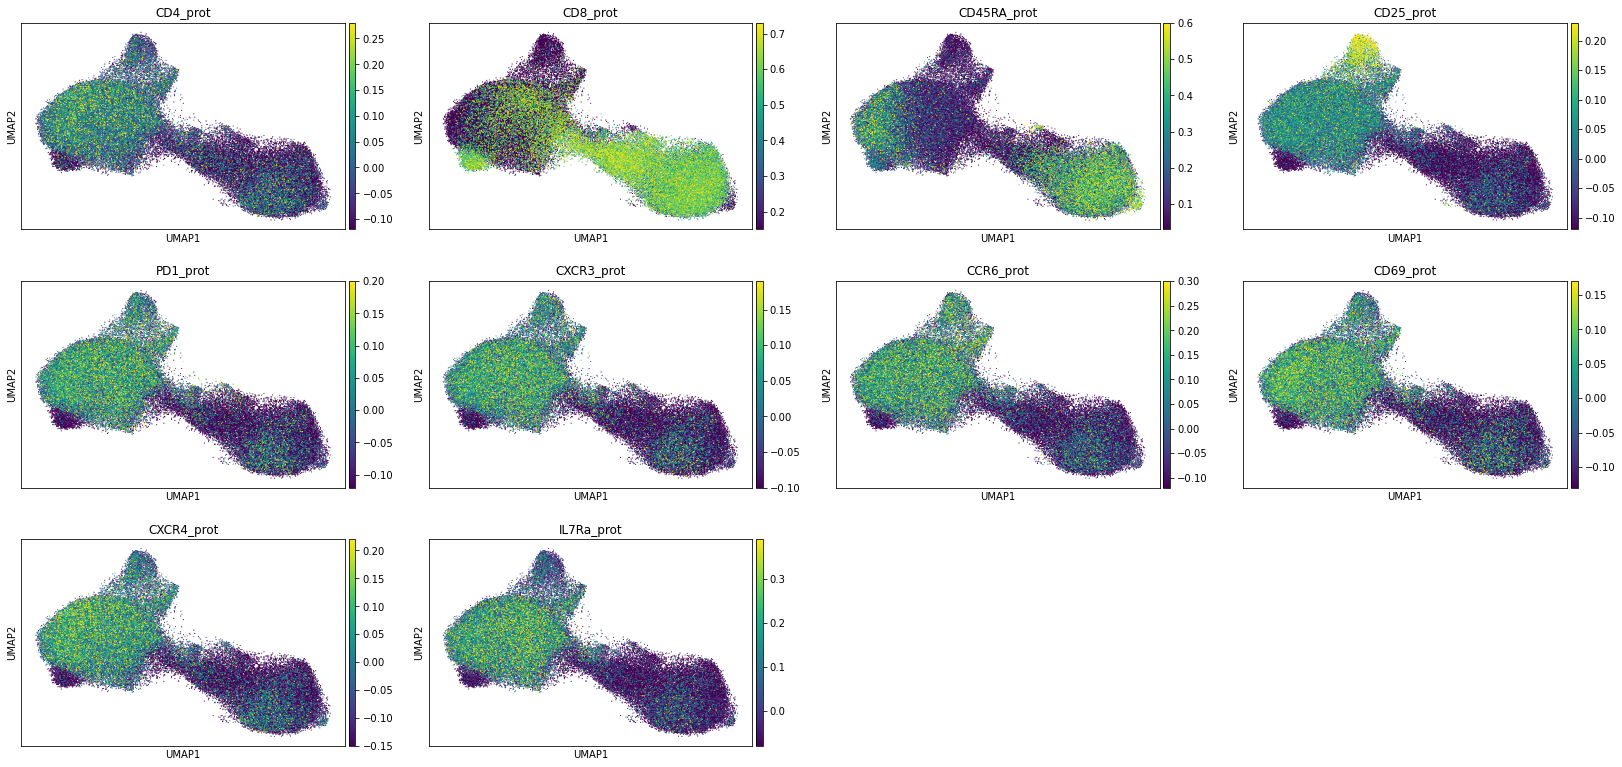

In [99]:
sc.pl.umap(adatax, color = [i for i in adatax.var.index], vmin = vmin, vmax = vmax, size = 5)

In [45]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [55]:
adatax2 = adata2[adata2.obs_names.isin(rnax.obs_names)].copy()
adatax2 = adatax2[:, adatax2.var.feature_types == 'Antibody Capture']
adatax2.obs = rnax.obs.copy()
adatax2.obsm = rnax.obsm.copy()
adatax2.obsp = rnax.obsp.copy()
adatax2 = clr_normalize_each_cell(adatax2)

In [67]:
adatax2.X

array([[0.        , 1.0207986 , 0.68629324, ..., 1.0207986 , 0.        ,
        0.7347558 ],
       [0.        , 1.0983118 , 0.40531486, ..., 1.0983118 , 0.        ,
        0.6929218 ],
       [0.        , 1.3016504 , 0.6947754 , ..., 1.0725808 , 0.        ,
        0.77494323],
       ...,
       [0.05913107, 2.724838  , 1.6134981 , ..., 1.1019969 , 0.        ,
        0.7402488 ],
       [0.        , 0.8548046 , 1.1073647 , ..., 1.143888  , 0.        ,
        0.9015795 ],
       [0.        , 1.1766262 , 0.7522207 , ..., 1.2481174 , 0.        ,
        0.5884636 ]], dtype=float32)

In [100]:
vmax2 = list()
for g in genes:
    idx = adatax2.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax2.X[:,idx], 0.99) * 100.0) / 100.0)
    vmax2.append(math.ceil(np.quantile(adatax2.X[:,idx], 0.99) * 100.0) / 100.0)
vmin2 = list()
for g in genes:
    idx = adatax2.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax2.X[:,idx], 0.5) * 100.0) / 100.0)
    vmin2.append(math.ceil(np.quantile(adatax2.X[:,idx], 0.5) * 100.0) / 100.0)

0.11
3.64
2.49
1.78
1.42
1.69
1.04
1.44
0.0
1.13
0.0
1.39
0.89
1.21
1.02
1.26
0.58
1.03
0.0
0.66


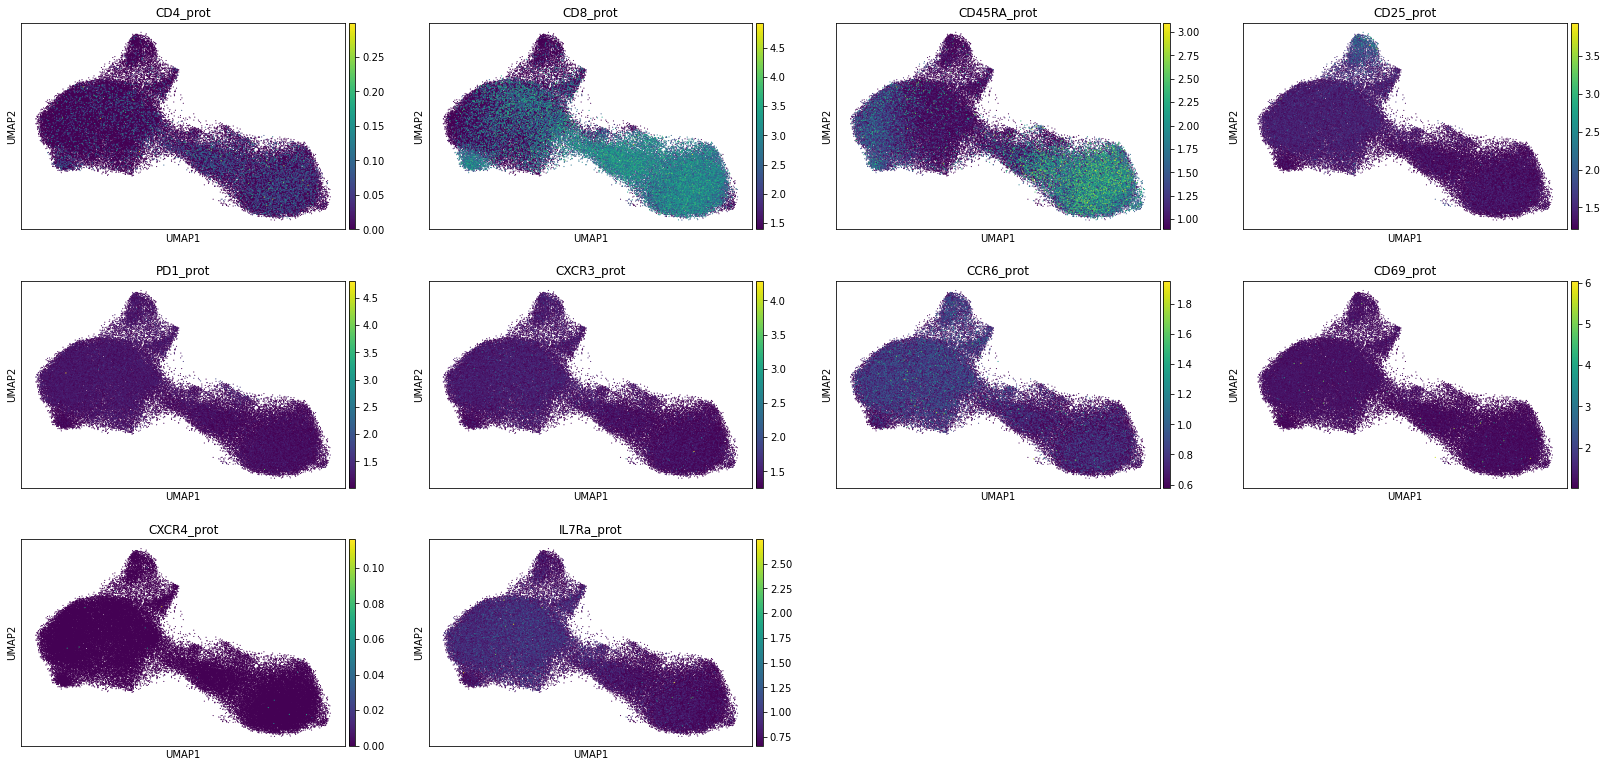

In [101]:
sc.pl.umap(adatax2, color = [i for i in adatax2.var.index], size = 5, vmin = vmin2)

In [91]:
adatax3 = adata[adata.obs_names.isin(rnax.obs_names)].copy()
adatax3 = adatax3[:, adatax3.var.feature_types == 'Antibody Capture']
adatax3.obs = rnax.obs.copy()
adatax3.obsm = rnax.obsm.copy()
adatax3.obsp = rnax.obsp.copy()
adatax3 = clr_normalize_each_cell(adatax3)

In [102]:
vmax3 = list()
for g in genes:
    idx = adatax3.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax3.X[:,idx], 0.99) * 100.0) / 100.0)
    vmax3.append(math.ceil(np.quantile(adatax3.X[:,idx], 0.99) * 100.0) / 100.0)
vmin3 = list()
for g in genes:
    idx = adatax3.var.index.get_loc(g)    
    print(math.ceil(np.quantile(adatax3.X[:,idx], 0.5) * 100.0) / 100.0)
    vmin3.append(math.ceil(np.quantile(adatax3.X[:,idx], 0.5) * 100.0) / 100.0)

0.49
5.56
3.89
2.09
1.87
2.41
1.71
1.39
0.0
2.23
0.0
2.06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


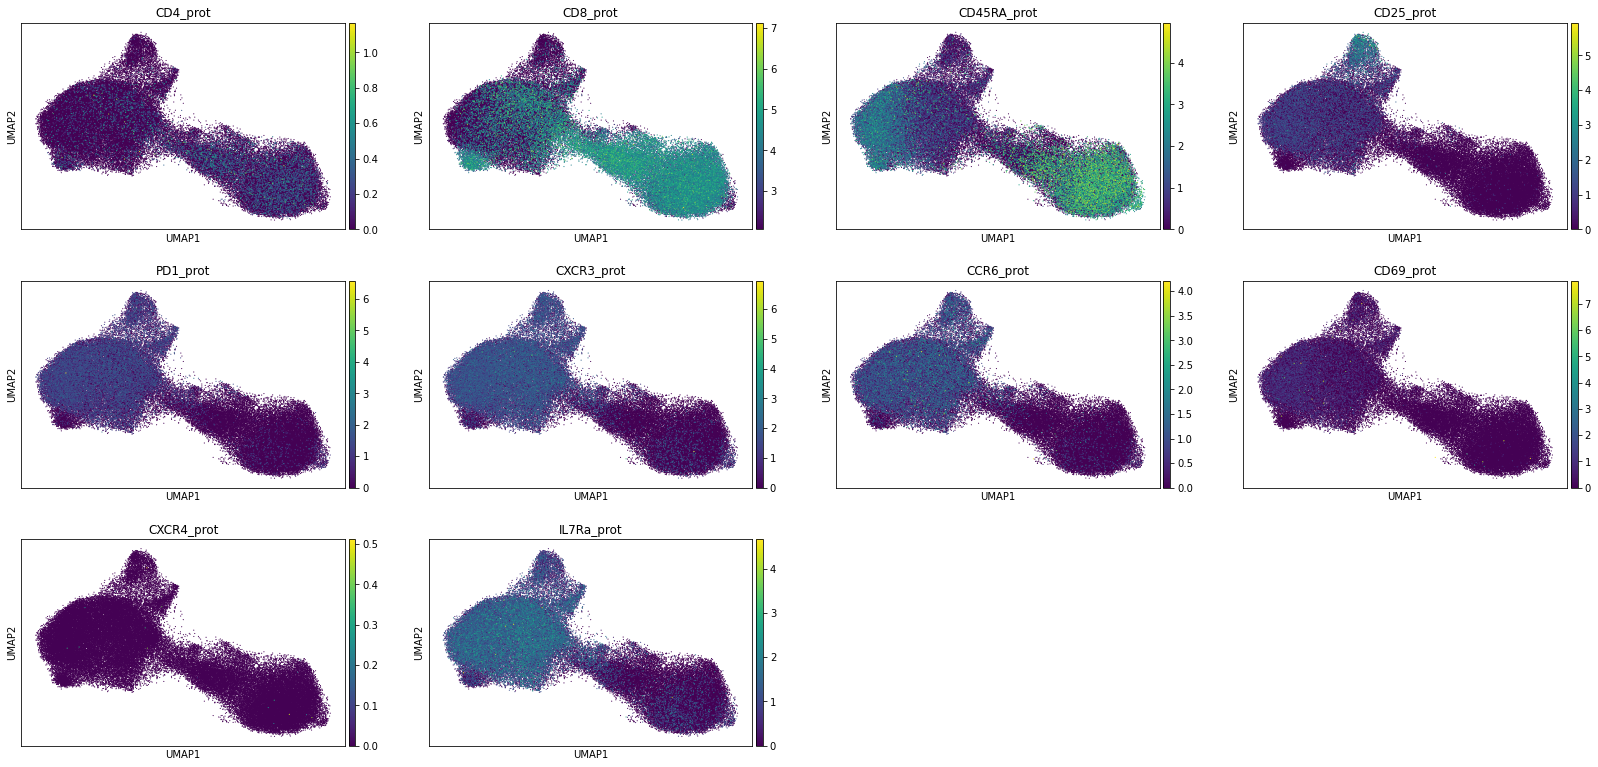

In [103]:
sc.pl.umap(adatax3, color = [i for i in adatax3.var.index], size = 5, vmin = vmin3)

In [109]:
# clean up each major celltype
rnax = rna[(rna.obs['initial_clustering'].isin(['B', 'Plasmablast']))].raw.to_adata().copy()
# Identify highly-variable genes
sc.pp.highly_variable_genes(rnax, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
## remove TRBV/TRAV and IGHV/IGLV/IGKV from the highly variable genes
import re
for i in rnax.var.index:
    if re.search('^IG[HKL][VDJC]', i):
        rnax.var.at[i, 'highly_variable'] = False
# sc.pl.highly_variable_genes(rnax)
# stash the normalized data in raw
rnax.raw = rnax
# filter to only highly variable
rnax = rnax[:, rnax.var['highly_variable']]

In [110]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(rnax, ['total_counts', 'pct_counts_mt'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(rnax, max_value = 10)
sc.tl.pca(rnax, svd_solver = 'arpack')

In [111]:
# run harmony. compute the neighborhood graph.
sc.external.pp.harmony_integrate(rnax, key='study_id')
sc.pp.neighbors(rnax, use_rep = 'X_pca_harmony')
# sc.external.pp.bbknn(rnax, batch_key='study_id')

2021-01-22 11:14:18,245 - harmonypy - INFO - Iteration 1 of 10
2021-01-22 11:14:21,023 - harmonypy - INFO - Iteration 2 of 10
2021-01-22 11:14:23,712 - harmonypy - INFO - Iteration 3 of 10
2021-01-22 11:14:25,482 - harmonypy - INFO - Iteration 4 of 10
2021-01-22 11:14:26,894 - harmonypy - INFO - Iteration 5 of 10
2021-01-22 11:14:28,194 - harmonypy - INFO - Iteration 6 of 10
2021-01-22 11:14:29,372 - harmonypy - INFO - Iteration 7 of 10
2021-01-22 11:14:30,557 - harmonypy - INFO - Iteration 8 of 10
2021-01-22 11:14:31,790 - harmonypy - INFO - Iteration 9 of 10
2021-01-22 11:14:32,978 - harmonypy - INFO - Converged after 9 iterations


## update metadata info

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_raw.h5ad')
adata2 = sc.read_h5ad('h5ad/adata_soupx_trans_raw.h5ad')
adata3 = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

In [3]:
# read in sample information
design_df = pd.read_csv('../sampleinfo.txt', sep = '\t')
design_df.set_index('sampleid', inplace = True)
design_df

study_id timepoint     sex  age treatment  peak_trop   BNP  \
sampleid                                                                 
Sample_Fq1     L6010       pre    male   61    Saline        999    75   
Sample_Fq2     L6010      post    male   61    Saline        999    75   
Sample_Fq3     L6009       pre    male   70    1.5MIU       1790   141   
Sample_Fq4     L6009      post    male   70    1.5MIU       1790   141   
Sample_Fq5     L6008       pre  female   66    1.5MIU       4255   630   
Sample_Fq6     L6008      post  female   66    1.5MIU       4255   630   
Sample_Fq7     L6007       pre  female   57    1.5MIU       2067    85   
Sample_Fq8     L6007      post  female   57    1.5MIU       2067    85   
Sample_Fq9     L6006       pre    male   59    1.5MIU        102    90   
Sample_Fq10    L6006      post    male   59    1.5MIU        102    90   
Sample_Fq11    L6005       pre    male   67    1.5MIU        472   298   
Sample_Fq12    L6005      post    male   67    1.5MIU        472   298   
Sample_Fq13    L6004       pre    male   79    Saline      10463  1479   
Sample_Fq14    L6004      post    male   79    Saline      10463  1479   
Sample_Fq15    L6002       pre    male   66    1.5MIU       3670   124   
Sample_Fq16    L6002      post    male   66    1.5MIU       3670   124   
Sample_Fq17    L7009       pre    male   57    2.5MIU       2070  1619   
Sample_Fq18    L7009      post    male   57    2.5MIU       2070  1619   
Sample_Fq19    L7008       pre    male   54    2.5MIU         17    43   
Sample_Fq20    L7008      post    male   54    2.5MIU         17    43   
Sample_Fq21    L7002       pre    male   55    Saline        107    33   
Sample_Fq22    L7002      post    male   55    Saline        107    33   
Sample_Fq23    L7006       pre    male   55    2.5MIU       1124    25   
Sample_Fq24    L7006      post    male   55    2.5MIU       1124    25   
Sample_Fq25    L7004       pre    male   53    Saline         17    25   
Sample_Fq26    L7004      post    male   53    Saline         17    25   
Sample_Fq27    L7007       pre  female   43    2.5MIU      26398   310   
Sample_Fq28    L7007      post  female   43    2.5MIU      26398   310   
Sample_Fq29    L7005       pre  female   52    2.5MIU        564   356   
Sample_Fq30    L7005      post  female   52    2.5MIU        564   356   
Sample_Fq31    L7003       pre    male   73    2.5MIU        319   936   
Sample_Fq32    L7003      post    male   73    2.5MIU        319   936   

             on_treatment_CRP  AEs treatment_group_1 treatment_group_2  \
sampleid                                                                 
Sample_Fq1               9.00    0         untreated         untreated   
Sample_Fq2               1.50    0         untreated         untreated   
Sample_Fq3               0.10    0         untreated         untreated   
Sample_Fq4               5.20    0            1.5MIU           treated   
Sample_Fq5               5.00    1         untreated         untreated   
Sample_Fq6              30.00    1            1.5MIU           treated   
Sample_Fq7               0.70    0         untreated         untreated   
Sample_Fq8               8.20    0            1.5MIU           treated   
Sample_Fq9               1.60    0         untreated         untreated   
Sample_Fq10             14.30    0            1.5MIU           treated   
Sample_Fq11              0.60    0         untreated         untreated   
Sample_Fq12              6.10    0            1.5MIU           treated   
Sample_Fq13              4.00    0         untreated         untreated   
Sample_Fq14              0.50    0         untreated         untreated   
Sample_Fq15              2.20    0         untreated         untreated   
Sample_Fq16              9.40    0            1.5MIU           treated   
Sample_Fq17             18.00    0         untreated         untreated   
Sample_Fq18             24.00    0            2.5MIU           treated   
Sample_Fq19    

In [4]:
rna.obs['sampleid'] = [x.rsplit('_',1)[0] for x in rna.obs_names]
adata.obs['sampleid'] = [x.rsplit('_',1)[0] for x in adata.obs_names]
adata2.obs['sampleid'] = [x.rsplit('_',1)[0] for x in adata2.obs_names]
adata3.obs['sampleid'] = [x.rsplit('_',1)[0] for x in adata3.obs_names]

In [5]:
for x in design_df.columns:
    rna.obs[x] = [design_df[x].to_dict()[s] for s in rna.obs['sampleid']]
    adata.obs[x] = [design_df[x].to_dict()[s] for s in adata.obs['sampleid']]
    adata2.obs[x] = [design_df[x].to_dict()[s] for s in adata2.obs['sampleid']]
    adata3.obs[x] = [design_df[x].to_dict()[s] for s in adata3.obs['sampleid']]

In [6]:
# save first
rna.write('h5ad/adata_soupx_trans_cite_rna.h5ad', compression = 'gzip')
adata.write('h5ad/adata_soupx_trans_cite_raw.h5ad', compression = 'gzip')
adata2.write('h5ad/adata_soupx_trans_raw.h5ad', compression = 'gzip')
adata3.write('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad', compression = 'gzip')

... storing 'sampleid' as categorical
... storing 'timepoint' as categorical
... storing 'treatment' as categorical
... storing 'study_id' as categorical
... storing 'sex' as categorical
... storing 'treatment_group_1' as categorical
... storing 'treatment_group_2' as categorical
... storing 'sampleid' as categorical
... storing 'timepoint' as categorical
... storing 'treatment' as categorical
... storing 'study_id' as categorical
... storing 'sex' as categorical
... storing 'treatment_group_1' as categorical
... storing 'treatment_group_2' as categorical
... storing 'sampleid' as categorical
... storing 'timepoint' as categorical
... storing 'treatment' as categorical
... storing 'study_id' as categorical
... storing 'sex' as categorical
... storing 'treatment_group_1' as categorical
... storing 'treatment_group_2' as categorical
... storing 'sampleid' as categorical
... storing 'timepoint' as categorical
... storing 'treatment' as categorical
... storing 'study_id' as categorical
...